<h3 style='color:blue'>Exercise: GPU performance for fashion mnist dataset</h3>

This notebook is derived from a tensorflow tutorial here: https://www.tensorflow.org/tutorials/keras/classification
So please refer to it before starting work on this exercise

You need to write code wherever you see `your code goes here` comment. You are going to do image classification for fashion mnist dataset and then you will benchmark the performance of GPU vs CPU for 1 hidden layer and then for 5 hidden layers. You will eventually fill out this table with your performance benchmark numbers


| Hidden Layer | CPU | GPU  |
|:------|:------|:------|
| 1 | 23.7 | 15.7 |
| 5 | 75 | 23.2 |

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

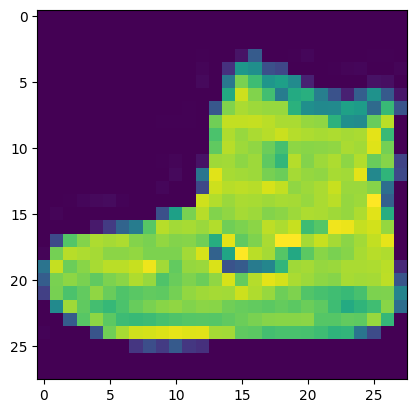

In [6]:
plt.imshow(train_images[0])

In [7]:
train_labels[0]

9

In [8]:
class_names[train_labels[0]]

'Ankle boot'

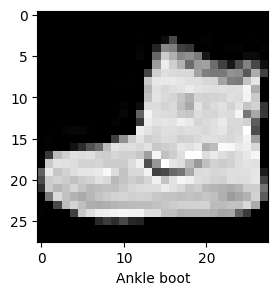

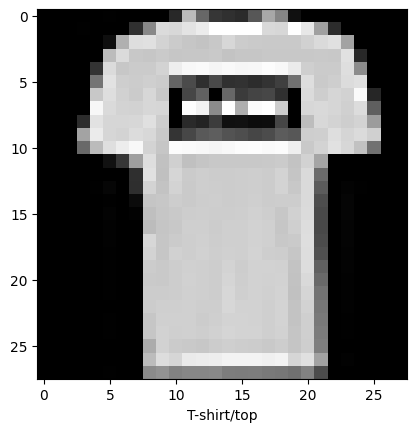

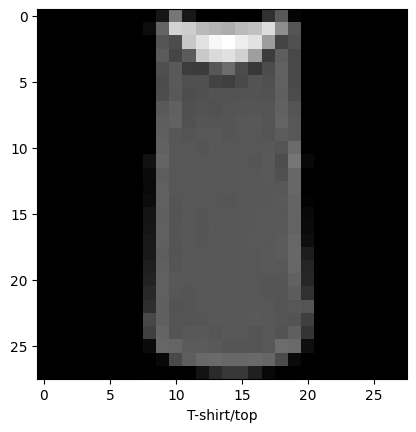

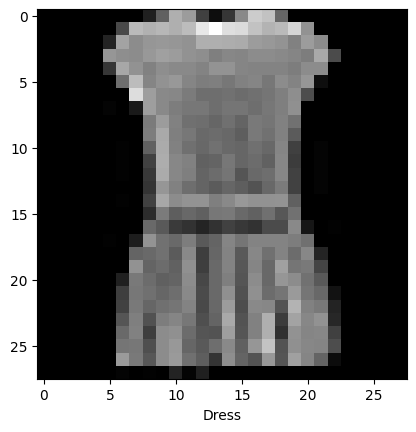

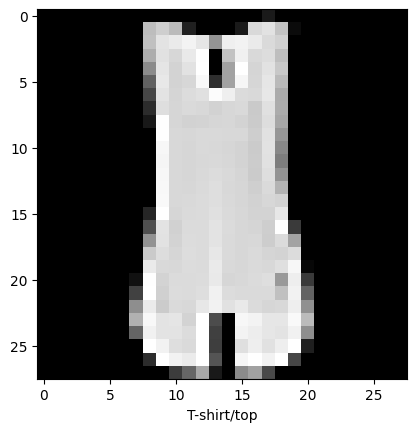

In [12]:
plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [10]:
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [13]:
def get_model(hidden_layers=1):
    layers = []
    # Your code goes here-----------START
    layers.append(keras.layers.Input(shape=(28, 28)))
    
    # Create Flatten input layers
    layers.append(keras.layers.Flatten())
    
    # Create hidden layers that are equal to hidden_layers argument in this function
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'))
    
    # Create output 
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    
    # Your code goes here-----------END

    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [14]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
 100/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5810 - loss: 1.2071

I0000 00:00:1712248055.647662      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7913 - loss: 0.5903
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8672 - loss: 0.3665
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8803 - loss: 0.3246
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8894 - loss: 0.2979
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8971 - loss: 0.2769


In [17]:
np.argmax(model.predict(test_images_scaled)[2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


1

In [16]:
test_labels[2]

1

In [18]:
tf.config.experimental.list_physical_devices() 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h4 style="color:purple">5 Epochs performance comparison for 1 hidden layer</h4>

In [19]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(1)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
  38/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4858 - loss: 1.4680   

2024-04-04 16:29:26.886932: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7935 - loss: 0.5895
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8659 - loss: 0.3663
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8841 - loss: 0.3201
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8885 - loss: 0.2990
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8949 - loss: 0.2819
23.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(1)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7946 - loss: 0.5846
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8666 - loss: 0.3678
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8818 - loss: 0.3236
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8878 - loss: 0.3018
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8958 - loss: 0.2789
15.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


<h4 style="color:purple">5 Epochs performance comparison with 5 hidden layers</h4>

In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model(5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7659 - loss: 0.6457
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8527 - loss: 0.4037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8706 - loss: 0.3567
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8823 - loss: 0.3277
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8865 - loss: 0.3074
1min 15s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7633 - loss: 0.6511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8545 - loss: 0.3984
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8712 - loss: 0.3561
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8779 - loss: 0.3308
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8872 - loss: 0.3056
23.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
